# Exploratory Data Analysis (EDA). Retail Industry
## Segment with Highest Total Sales


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading the dataset

In [2]:
# Loads the dataset
dataframe_retail = pd.read_csv('data/dataset.csv')

### Exploratory Analysis

In [3]:
# Checking for duplicated data
dataframe_retail[dataframe_retail.duplicated()]

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue


In [4]:
# Checking for missing values
dataframe_retail.isnull().sum()

OrderId            0
OrderDate          0
CustomerId         0
Segment            0
Country            0
City               0
State              0
ProductId          0
Category           0
SubCategory        0
TotalOrderValue    0
dtype: int64

### Determine the total amount sold per segment each year.



In [5]:
# Convert the column OrderDate to Datetime
dataframe_retail['OrderDate'] = pd.to_datetime(dataframe_retail['OrderDate'], dayfirst = True)

In [6]:
dataframe_retail.dtypes

OrderId                    object
OrderDate          datetime64[ns]
CustomerId                 object
Segment                    object
Country                    object
City                       object
State                      object
ProductId                  object
Category                   object
SubCategory                object
TotalOrderValue           float64
dtype: object

In [7]:
dataframe_retail.head()

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [9]:
# Extract the year from the OrderDate
dataframe_retail['Year'] = dataframe_retail['OrderDate'].dt.year

In [10]:
dataframe_retail.head()

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue,Year
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [11]:
# Get the total amount sold per segment each year.
dataframe_retail_total_per_segment_year = dataframe_retail.groupby(['Year','Segment'])['TotalOrderValue'].sum()

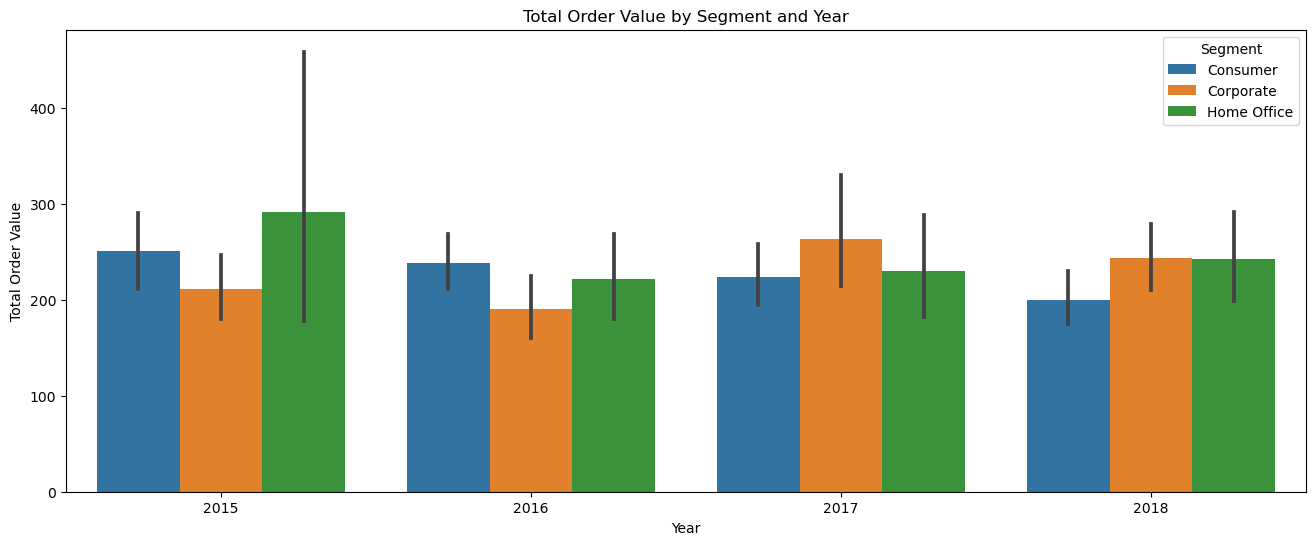

In [22]:
# Create plot.

# Image Size
plt.figure(figsize = (16,6))
sns.barplot(data=dataframe_retail, x='Year', y='TotalOrderValue', hue='Segment')
plt.xlabel('Year')
plt.ylabel('Total Order Value')
plt.title('Total Order Value by Segment and Year')
plt.legend(title='Segment')
plt.show()